In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xml.etree.ElementTree as xet
from glob import glob
import os

In [4]:
xml_path = os.path.join(os.getcwd(),'images','*xml')

In [5]:
xml_path

'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\*xml'

In [6]:
path = glob(xml_path)

In [7]:
path

['C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N1.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N100.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N101.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N102.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N103.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N104.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N105.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N106.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N107.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N108.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N109.xml',
 'C:\\Users\\admin\\Documents\\ML\\project\\A

In [8]:
label_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])


In [9]:

for file in path:
    data = xet.parse(file)
    root = data.getroot()
    object = root.find('object')
    bnd_boxtag = object.find('bndbox')
    
    x_min = int(bnd_boxtag.find('xmin').text)
    x_max = int(bnd_boxtag.find('xmax').text)
    y_min = int(bnd_boxtag.find('ymin').text)
    y_max = int(bnd_boxtag.find('ymax').text)
    
    # Appending extracted coordinated into a dictionary
    
    label_dict['filepath'].append(file)
    label_dict['xmin'].append(x_min)
    label_dict['xmax'].append(x_max)
    label_dict['ymin'].append(y_min)
    label_dict['ymax'].append(y_max)
    

In [10]:
df = pd.DataFrame(label_dict)
df.to_csv('labels.csv', index= False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,C:\Users\admin\Documents\ML\project\Automatic_...,1093,1396,645,727
1,C:\Users\admin\Documents\ML\project\Automatic_...,134,301,312,350
2,C:\Users\admin\Documents\ML\project\Automatic_...,31,139,128,161
3,C:\Users\admin\Documents\ML\project\Automatic_...,164,316,216,243
4,C:\Users\admin\Documents\ML\project\Automatic_...,813,1067,665,724


In [12]:
filename = df['filepath'][0]

In [13]:
def get_filename(filename):
    image_filename = xet.parse(filename).getroot().find('filename').text
    image_filepath = os.path.join(os.getcwd(),'images',image_filename)
    return image_filepath

In [14]:
image_path = list(df['filepath'].apply(get_filename))

In [17]:
image_path

['C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N1.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N100.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N101.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N102.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N103.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N104.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N105.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N106.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N107.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N108.jpeg',
 'C:\\Users\\admin\\Documents\\ML\\project\\Automatic_Number_Plate\\images\\N109.jpeg',
 'C:\\Users\\admin\\Documents\\ML\

In [15]:
import plotly.express as px
from skimage import io
from IPython.display import Image

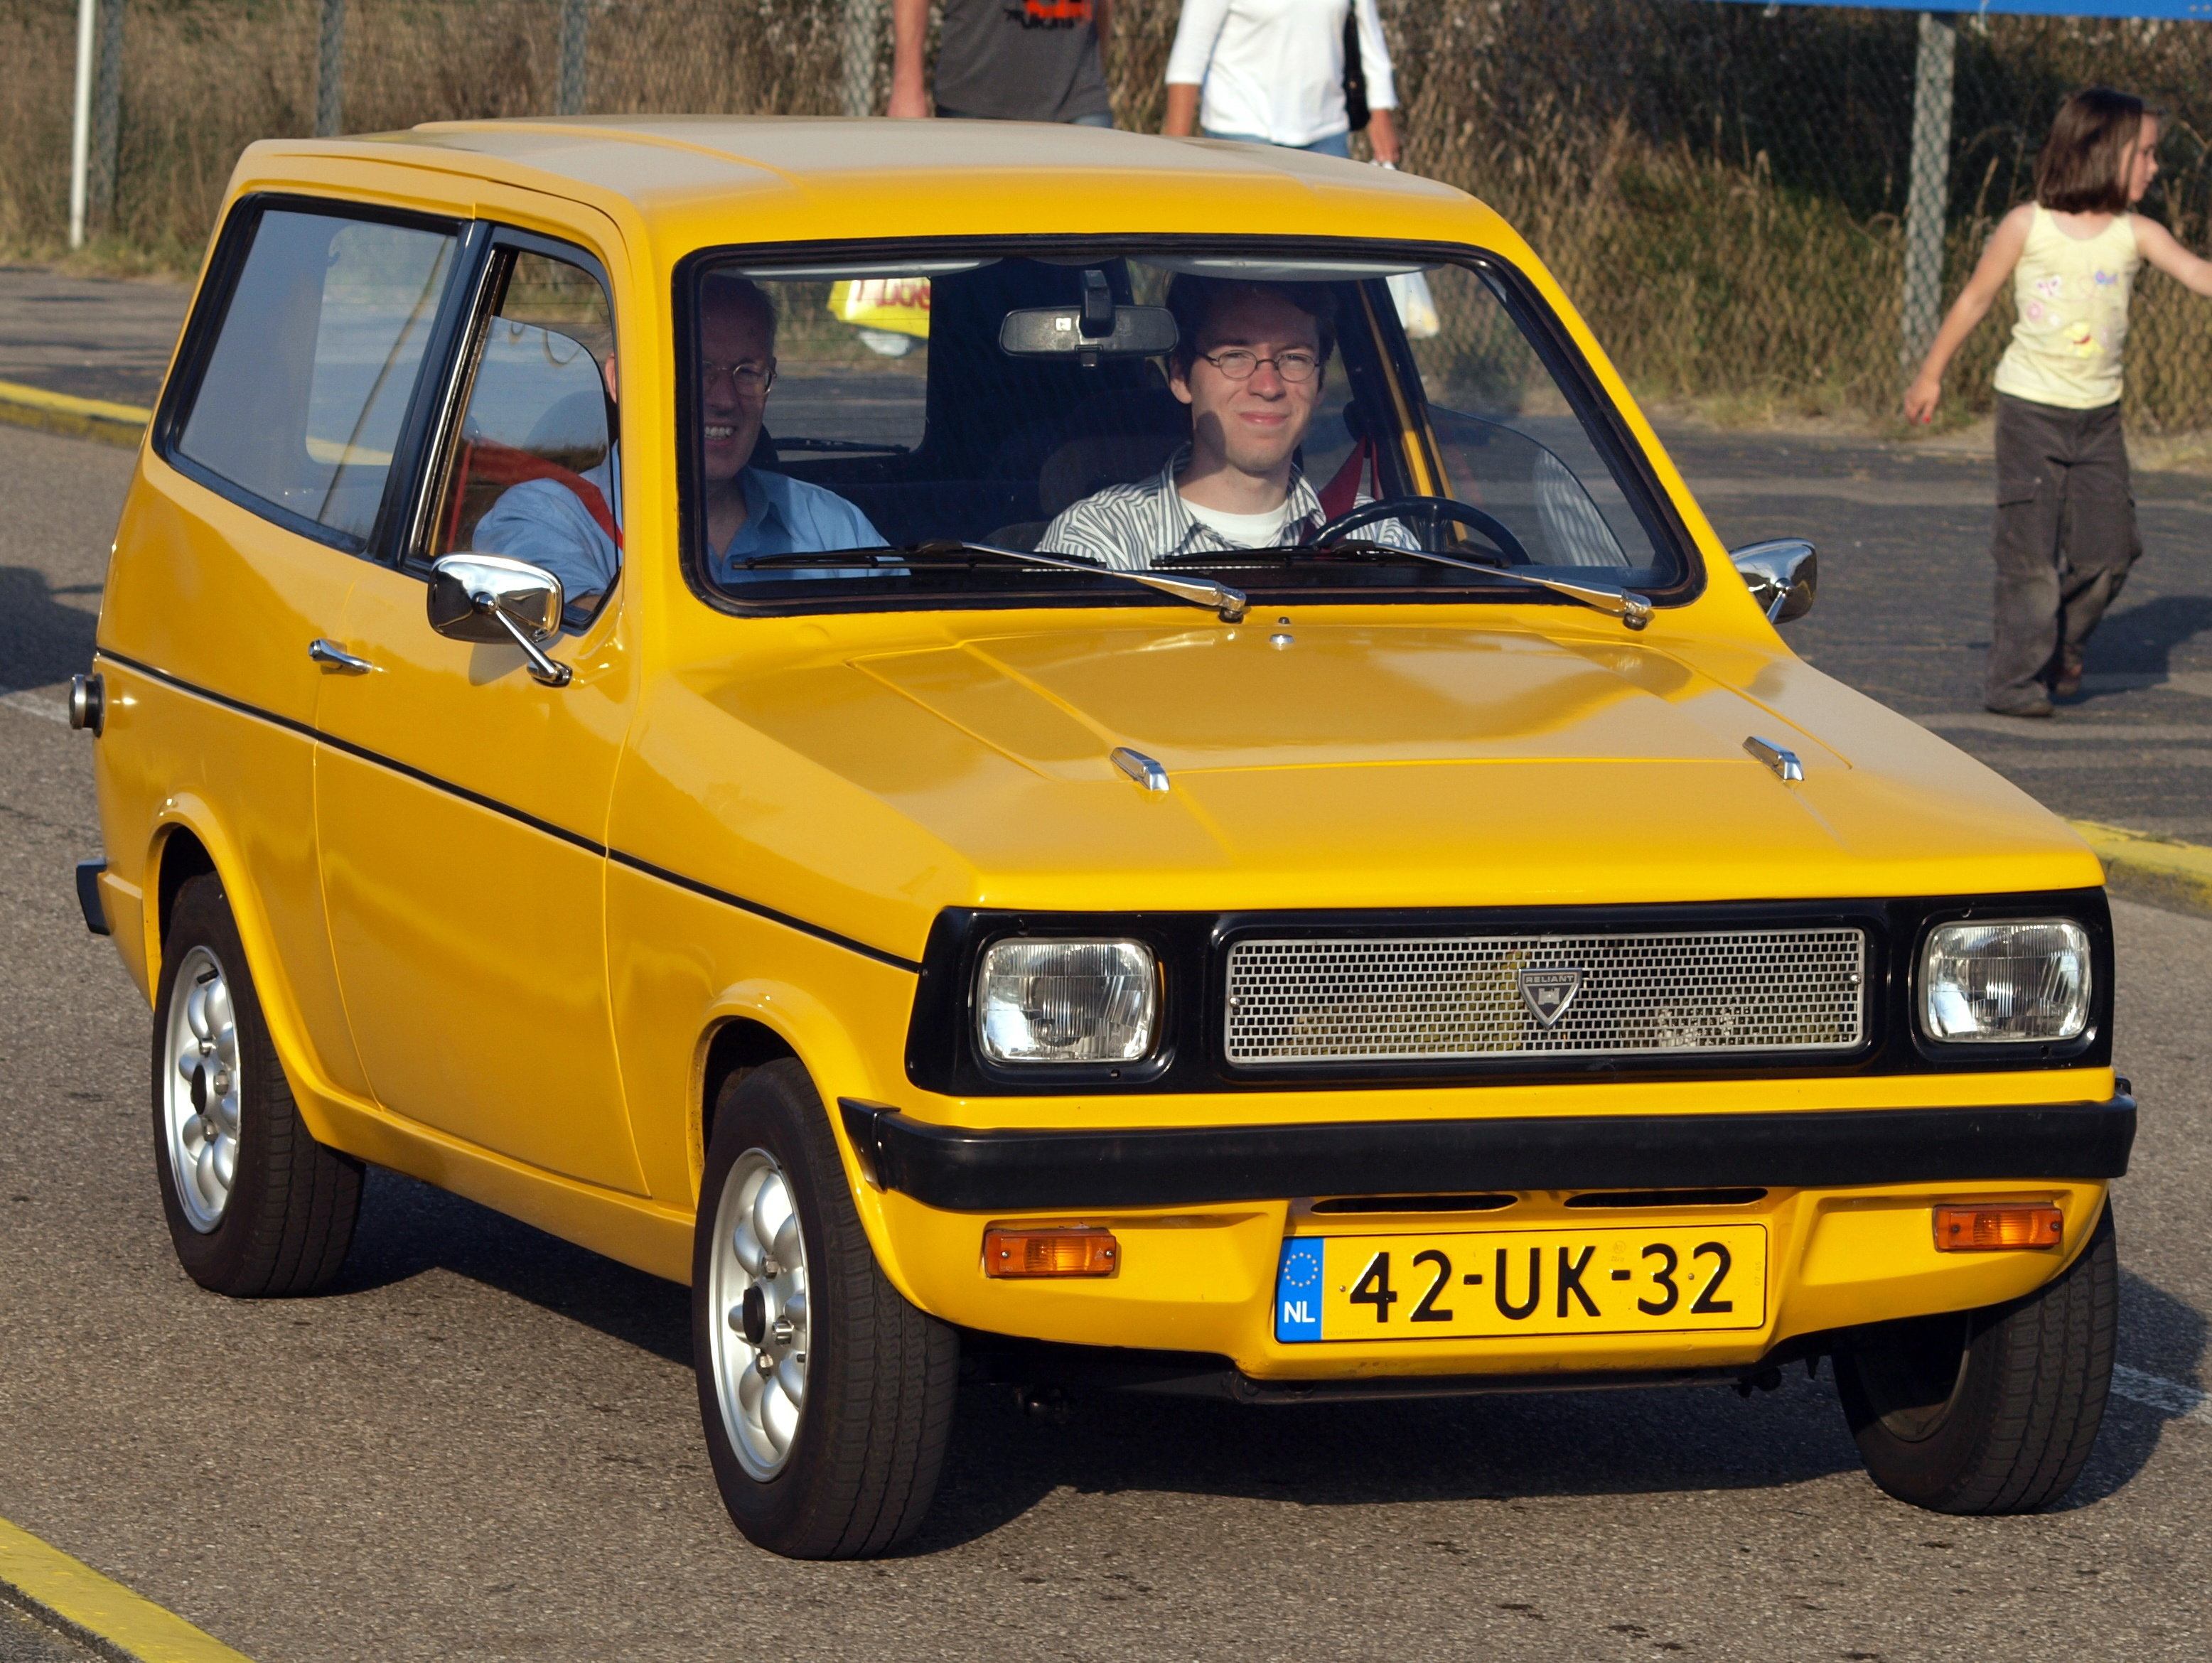

In [60]:
file_path = image_path[100] #path of our image N2.jpeg
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')
image_filepath =os.path.join(os.getcwd(),'Test','car_image.jpeg')
Image(filename=image_filepath) 

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [25]:
labels = df.iloc[:,1:].values
output= []
data = []

In [26]:
for index in range(len(image_path)):
    image = image_path[index]
    image_array = cv2.imread(image)
    height, width, depth = image_array.shape
    
    load_image = load_img(image, target_size=(224,224))
    load_image_array = img_to_array(load_image)
    
    # Normalize our image
    
    normalize_load_image_array = load_image_array/255.0
    
    # Normalize our labels
    
    xmin, xmax,ymin,ymax = labels[index]
    normalized_xmin, normalized_xmax = xmin/width, xmax/width
    normalized_ymin, normalized_ymax = ymin/height, ymax/height
    label_normalized = (normalized_xmin, normalized_xmax,normalized_ymin, normalized_ymax)
    
    # Appending Outputs and Data
    data.append(normalize_load_image_array)
    output.append(label_normalized)

In [28]:
output

[(0.5692708333333333,
  0.7270833333333333,
  0.5972222222222222,
  0.6731481481481482),
 (0.29777777777777775,
  0.6688888888888889,
  0.7482014388489209,
  0.8393285371702638),
 (0.12449799196787148,
  0.5582329317269076,
  0.5355648535564853,
  0.6736401673640168),
 (0.34309623430962344,
  0.6610878661087866,
  0.5468354430379747,
  0.6151898734177215),
 (0.45166666666666666,
  0.5927777777777777,
  0.5541666666666667,
  0.6033333333333334),
 (0.17506631299734748,
  0.40848806366047746,
  0.680327868852459,
  0.8073770491803278),
 (0.72, 0.868, 0.6020761245674741, 0.6747404844290658),
 (0.22459016393442624,
  0.42950819672131146,
  0.51340206185567,
  0.5979381443298969),
 (0.46938775510204084,
  0.8072562358276644,
  0.4793388429752066,
  0.790633608815427),
 (0.38016528925619836,
  0.7066115702479339,
  0.4824561403508772,
  0.5635964912280702),
 (0.2690909090909091,
  0.43454545454545457,
  0.4681647940074906,
  0.599250936329588),
 (0.4763636363636364, 0.68, 0.7103825136612022, 

In [29]:
X = np.array(data, dtype= np.float32)
y = np.array(output, dtype= np.float32)

In [30]:
# Splitting data into train and test split
x_train,x_test,y_train,y_test = train_test_split(X,y, train_size=0.8,random_state=0)
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [32]:
inception_renet = InceptionResNetV2(weights='imagenet', include_top=False,input_tensor=Input(shape=(224,224,3)))
output_model = inception_renet.output
output_model = Flatten()(output_model)
output_model = Dense(500, activation = 'relu')(output_model)
output_model = Dense(250, activation = 'relu')(output_model)
output_model = Dense(4, activation ='sigmoid')(output_model)

219070464/219055592 [==============================] - 39s 0us/step


In [33]:
model = Model(inputs = inception_renet.input, outputs= output_model)

In [34]:
# Compile our Model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'])

In [35]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 conv2d_81 (Conv2D)             (None, 12, 12, 128)  139264      ['block17_1_ac[0][0]']           
                                                                                                  
 batch_normalization_81 (BatchN  (None, 12, 12, 128)  384        ['conv2d_81[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_81 (Activation)     (None, 12, 12, 128)  0           ['batch_normalization_81[0][0]'] 
                                                                                                  
 conv2d_82 (Conv2D)             (None, 12, 12, 160)  143360      ['activation_81[0][0]']          
                                                                                                  
 batch_normalization_82 (BatchN  (None, 12, 12, 160)  480        ['conv2d_82[0][0]']              
 ormalizat

 activation_160 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_160[0][0]']
                                                                                                  
 conv2d_156 (Conv2D)            (None, 12, 12, 256)  278528      ['block17_20_ac[0][0]']          
                                                                                                  
 conv2d_158 (Conv2D)            (None, 12, 12, 256)  278528      ['block17_20_ac[0][0]']          
                                                                                                  
 conv2d_161 (Conv2D)            (None, 12, 12, 288)  663552      ['activation_160[0][0]']         
                                                                                                  
 batch_normalization_156 (Batch  (None, 12, 12, 256)  768        ['conv2d_156[0][0]']             
 Normalization)                                                                                   
          

In [47]:
import datetime

In [62]:
%%time
tensorboard = TensorBoard('object detection')
history = model.fit(x=x_train, y= y_train,batch_size=8, epochs=150, validation_data=(x_test,y_test),callbacks=[tensorboard])

Epoch 1/150


KeyboardInterrupt: 

In [46]:
model.save('anpr_model.h5')

In [38]:
model = tf.keras.models.load_model('anpr_model.h5')

In [39]:
def object_detection(path, filename,model):
    # Read image
    image = load_img(path)  # PIL object
    image = np.array(image, dtype=np.uint8)  # 8 bit array (0,255)
    image1 = load_img(path, target_size=(224, 224))
    # Data preprocessing
    # Convert into array and get the normalized output
    image_arr_224 = img_to_array(image1)/255.0
    h, w, d = image.shape
    #### In order to pass this image to our model, we need to provide the data in the dynamic fourth dimension.
    #### 1 indicates the number of image, As here we are passing only one image
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    # Make predictions
    coords = model.predict(test_arr)
    # Denormalize the values
    denorm = np.array([w, w, h, h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # Draw bounding on top the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2, (0, 255, 0), 5)
    # Convert into bgr
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    prediction_img_path = os.path.join(os.getcwd(),'predictions')
    os.makedirs(prediction_img_path, exist_ok=True)
    prediction_img_path = os.path.join(os.getcwd(),'predictions',filename)
    cv2.imwrite(prediction_img_path, image_bgr)
    return coords

In [42]:
path = './Test/car_image.jpeg'
cordinates = object_detection(path,'car_image.jpeg',model)

(749, 667) (1566, 895)


In [43]:
path = './Test/N1.jpeg'
cordinates = object_detection(path,'N1.jpeg',model)

(749, 667) (1566, 895)
